# Introdução a CNNs com tf-keras

## Começar com MLP e comparar com CNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix
#tirar se não usam GPU
gp=tf.config.experimental.list_physical_devices('GPU')
print(gp)
tf.config.experimental.set_memory_growth(gp[0],True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig=plt.figure(figsize=(6.5,6.5))
    plt.imshow(cm, interpolation='none', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,ha='right')
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #return fig

## 1. Preparar dados  para treino/teste da rede 
Nota: vêm em formato de imagem (28x28)
### Necessário converter os labels em vetores de 10 (nº de classes) dimensões com 0s e 1s. 
Existem funções no keras e sklearn que já fazem isto.

### Necessário tb normalizar dados.

In [18]:
(X1,y1),(X2,y2)=keras.datasets.fashion_mnist.load_data()
X1=(X1/255.-.5)*2.
X2=(X2/255.-.5)*2.
Y1=keras.utils.to_categorical(y1)
Y2=keras.utils.to_categorical(y2)

(-0.5, 619.5, 309.5, -0.5)

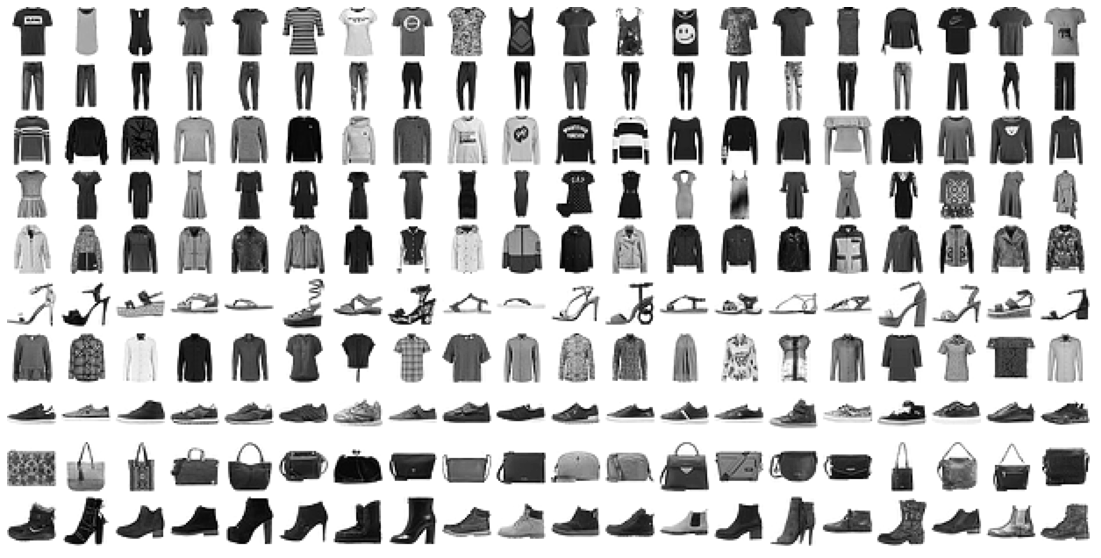

In [19]:
idxList=[]
for i in range(10):
    idxTemp=np.argwhere(y1==i).squeeze()
    idxList.append(idxTemp)


for i in range(10):
    idx=idxList[i]
    for n in range(20):
        if n==0:
            Img=np.hstack((255-X1[idx[n]],np.ones((28,3))*255))
        else:
            Img=np.hstack((Img,255-X1[idx[n]],np.ones((28,3))*255))

    if i==0:
        ImgT=np.vstack((Img,np.ones((3,Img.shape[1]))*255))
    else:
        ImgT=np.vstack((ImgT,Img,np.ones((3,Img.shape[1]))*255))

plt.figure(figsize=(20,10))
plt.imshow(ImgT,cmap='gray')
plt.axis('off')

## Treinar rede MLP e ver resultados

In [5]:
nn=keras.Sequential()
#1º vetorizar imagens
nn.add(keras.layers.Flatten(input_shape=[28,28]))
nn.add(keras.layers.Dropout(.25))
nn.add(keras.layers.Dense(50, activation="relu"))
nn.add(keras.layers.Dropout(.25))
nn.add(keras.layers.Dense(100, activation="relu"))
nn.add(keras.layers.Dropout(.5))
nn.add(keras.layers.Dense(50, activation="relu"))
nn.add(keras.layers.Dropout(.5))
nn.add(keras.layers.Dense(10,activation='softmax'))

print(nn.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5

In [6]:
nn.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
train=nn.fit(X1,Y1,validation_data=(X2,Y2),batch_size=1024,epochs=100)

Epoch 1/100
59/59 [==============================] - 4s 18ms/step - loss: 1.8771 - accuracy: 0.3299 - val_loss: 0.9365 - val_accuracy: 0.6949
Epoch 2/100
59/59 [==============================] - 1s 12ms/step - loss: 1.1202 - accuracy: 0.6097 - val_loss: 0.6778 - val_accuracy: 0.7605
Epoch 3/100
59/59 [==============================] - 1s 13ms/step - loss: 0.9069 - accuracy: 0.6835 - val_loss: 0.6015 - val_accuracy: 0.7808
Epoch 4/100
59/59 [==============================] - 1s 13ms/step - loss: 0.8079 - accuracy: 0.7156 - val_loss: 0.5671 - val_accuracy: 0.7969
Epoch 5/100
59/59 [==============================] - 1s 12ms/step - loss: 0.7542 - accuracy: 0.7363 - val_loss: 0.5423 - val_accuracy: 0.8093
Epoch 6/100
59/59 [==============================] - 1s 13ms/step - loss: 0.7185 - accuracy: 0.7471 - val_loss: 0.5306 - val_accuracy: 0.8149
Epoch 7/100
59/59 [==============================] - 1s 12ms/step - loss: 0.6935 - accuracy: 0.7601 - val_loss: 0.5224 - val_accuracy: 0.8170
Epoch 

59/59 [==============================] - 1s 12ms/step - loss: 0.4928 - accuracy: 0.8284 - val_loss: 0.4003 - val_accuracy: 0.8563
Epoch 59/100
59/59 [==============================] - 1s 12ms/step - loss: 0.4893 - accuracy: 0.8296 - val_loss: 0.3996 - val_accuracy: 0.8525
Epoch 60/100
59/59 [==============================] - 1s 12ms/step - loss: 0.4948 - accuracy: 0.8277 - val_loss: 0.4048 - val_accuracy: 0.8506
Epoch 61/100
59/59 [==============================] - 1s 12ms/step - loss: 0.4891 - accuracy: 0.8298 - val_loss: 0.4055 - val_accuracy: 0.8537
Epoch 62/100
59/59 [==============================] - 1s 12ms/step - loss: 0.4946 - accuracy: 0.8261 - val_loss: 0.4054 - val_accuracy: 0.8528
Epoch 63/100
59/59 [==============================] - 1s 12ms/step - loss: 0.4880 - accuracy: 0.8291 - val_loss: 0.4027 - val_accuracy: 0.8559
Epoch 64/100
59/59 [==============================] - 1s 12ms/step - loss: 0.4841 - accuracy: 0.8312 - val_loss: 0.3977 - val_accuracy: 0.8583
Epoch 65/100

## Visualizar evolução no treino
## + Resultados no teste

Confusion matrix, without normalization
Nº total de erros (em 10000): 1391
Percentagem de acertos: 86.090000


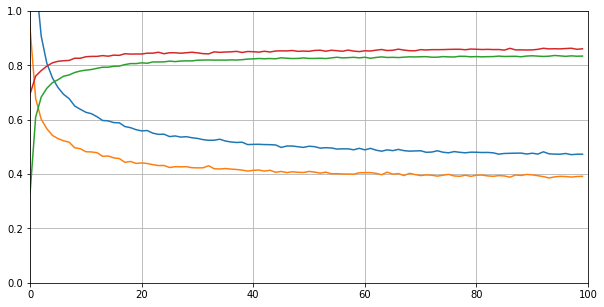

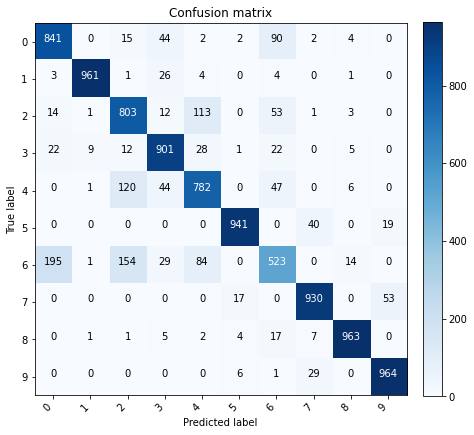

In [8]:
h=train.history
plt.figure(figsize=(10,5))
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.grid(True)
plt.axis([0,100,0,1])

#classificar teste
Y2e=nn.predict(X2)
y2e=np.argmax(Y2e,axis=1)

plot_confusion_matrix(confusion_matrix(y2,y2e),range(10))
print('Nº total de erros (em %d): %d'%(y2.shape[0],np.sum(y2!=y2e)))
print('Percentagem de acertos: %2f'%((1-np.sum(y2!=y2e)/y2.shape[0])*100))

## 2. Definir CNN

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers

cnn = models.Sequential()
cnn.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(layers.Conv2D(16, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (2, 2), activation='relu'))
cnn.add(layers.Conv2D(64, (2, 2), activation='relu')) 
# Atencap que o output shaape quando chega a (None, 0, 0, 64) da erro por causa dos zeros
cnn.add(layers.Flatten())
cnn.add(keras.layers.Dropout(0.5))
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))


In [10]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)         

#### Necessário converter input data para formato que seja compatível (4 dimensões)

In [11]:
Xtrain=X1.reshape(-1,28,28,1)
Xtest=X2.reshape(-1,28,28,1)

In [12]:
cnn.compile(optimizer="nadam",loss="categorical_crossentropy",metrics=["accuracy"])

In [13]:
history = cnn.fit(Xtrain, Y1, epochs=50,batch_size=1024,validation_data=(Xtest, Y2))

Epoch 1/50
59/59 [==============================] - 20s 250ms/step - loss: 1.3330 - accuracy: 0.5319 - val_loss: 0.7340 - val_accuracy: 0.7246
Epoch 2/50
59/59 [==============================] - 13s 213ms/step - loss: 0.7016 - accuracy: 0.7386 - val_loss: 0.5837 - val_accuracy: 0.7808
Epoch 3/50
59/59 [==============================] - 13s 216ms/step - loss: 0.5993 - accuracy: 0.7742 - val_loss: 0.5205 - val_accuracy: 0.8097
Epoch 4/50
59/59 [==============================] - 13s 214ms/step - loss: 0.5311 - accuracy: 0.8013 - val_loss: 0.4899 - val_accuracy: 0.8112
Epoch 5/50
59/59 [==============================] - 12s 210ms/step - loss: 0.4907 - accuracy: 0.8193 - val_loss: 0.4479 - val_accuracy: 0.8340
Epoch 6/50
59/59 [==============================] - 13s 213ms/step - loss: 0.4543 - accuracy: 0.8333 - val_loss: 0.4114 - val_accuracy: 0.8507
Epoch 7/50
59/59 [==============================] - 13s 225ms/step - loss: 0.4313 - accuracy: 0.8443 - val_loss: 0.3844 - val_accuracy: 0.8605

Confusion matrix, without normalization
Nº total de erros (em 10000): 864
Percentagem de acertos: 91.360000


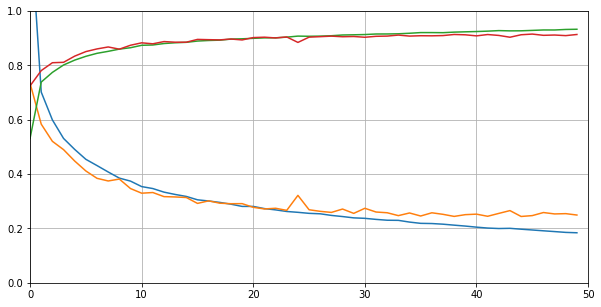

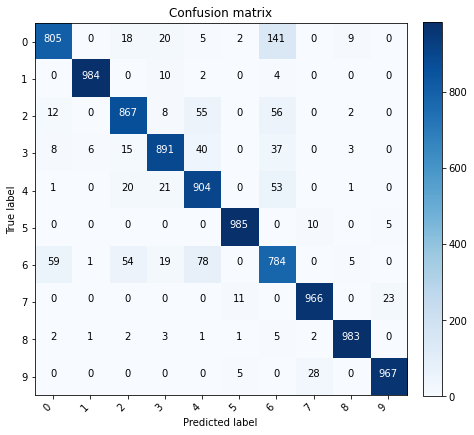

In [16]:
h=history.history
plt.figure(figsize=(10,5))
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.grid(True)
plt.axis([0,50,0,1])

#classificar teste
Y2e=cnn.predict(Xtest)
y2e=np.argmax(Y2e,axis=1)

plot_confusion_matrix(confusion_matrix(y2,y2e),range(10))
print('Nº total de erros (em %d): %d'%(y2.shape[0],np.sum(y2!=y2e)))
print('Percentagem de acertos: %2f'%((1-np.sum(y2!=y2e)/y2.shape[0])*100))

#### Visualizar erros

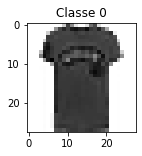

Classe 0 -> Classe 2 (total de 18 erros)


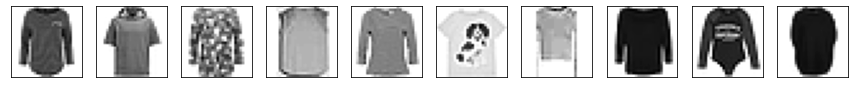

Classe 0 -> Classe 3 (total de 20 erros)


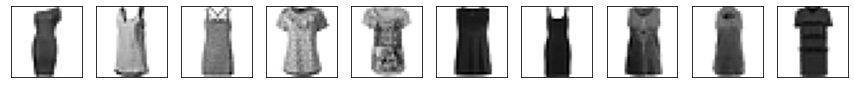

Classe 0 -> Classe 6 (total de 141 erros)


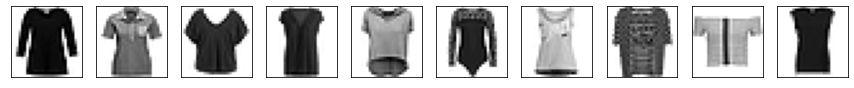

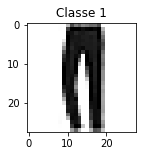

Classe 1 -> Classe 3 (total de 10 erros)


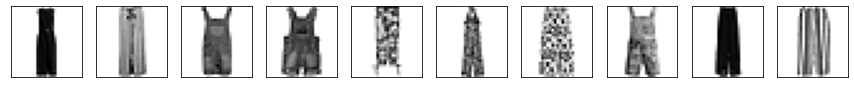

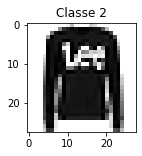

Classe 2 -> Classe 0 (total de 12 erros)


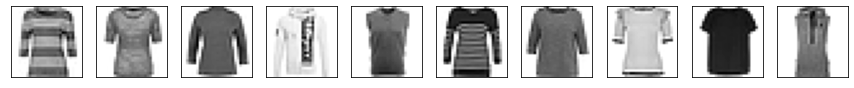

Classe 2 -> Classe 4 (total de 55 erros)


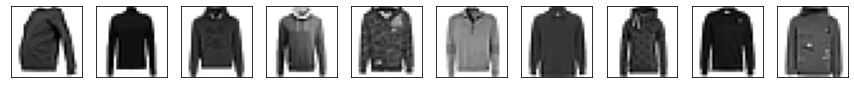

Classe 2 -> Classe 6 (total de 56 erros)


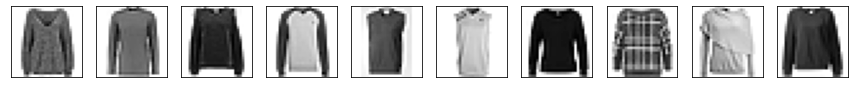

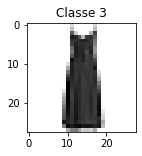

Classe 3 -> Classe 2 (total de 15 erros)


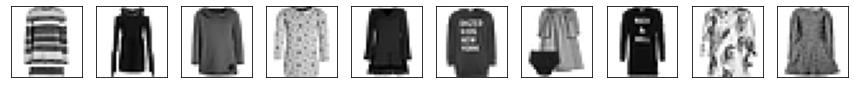

Classe 3 -> Classe 4 (total de 40 erros)


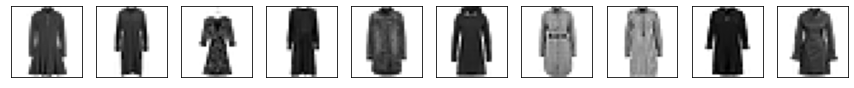

Classe 3 -> Classe 6 (total de 37 erros)


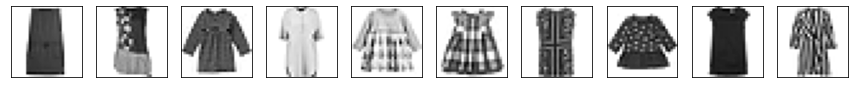

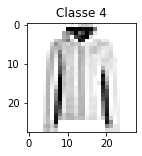

Classe 4 -> Classe 2 (total de 20 erros)


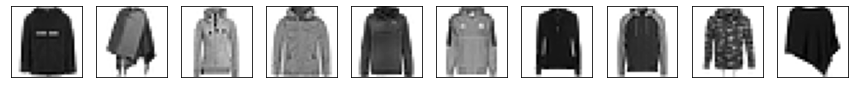

Classe 4 -> Classe 3 (total de 21 erros)


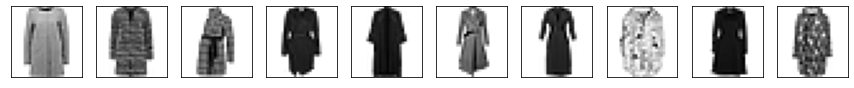

Classe 4 -> Classe 6 (total de 53 erros)


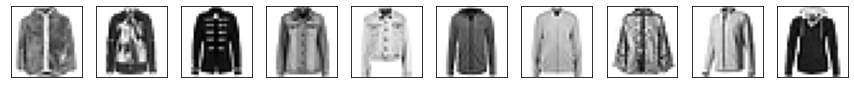

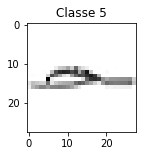

Classe 5 -> Classe 7 (total de 10 erros)


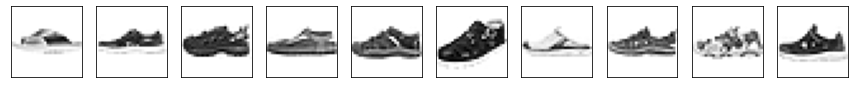

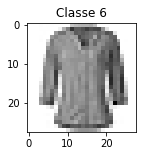

Classe 6 -> Classe 0 (total de 59 erros)


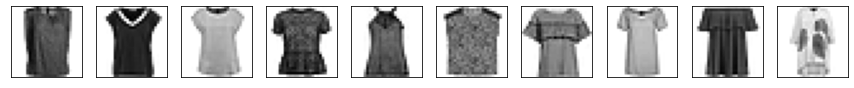

Classe 6 -> Classe 2 (total de 54 erros)


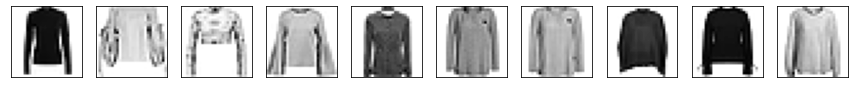

Classe 6 -> Classe 3 (total de 19 erros)


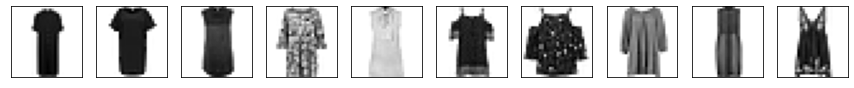

Classe 6 -> Classe 4 (total de 78 erros)


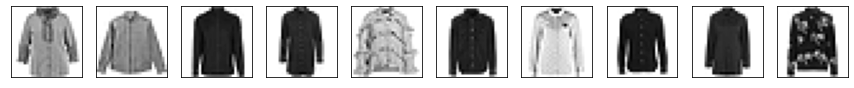

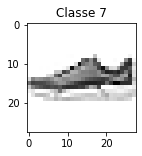

Classe 7 -> Classe 5 (total de 11 erros)


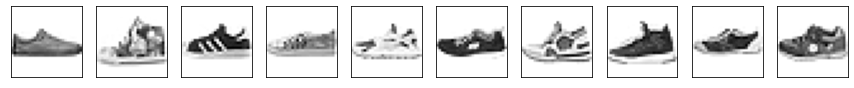

Classe 7 -> Classe 9 (total de 23 erros)


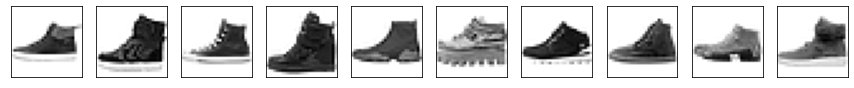

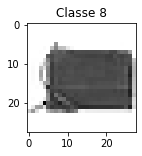

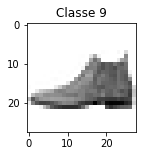

Classe 9 -> Classe 7 (total de 28 erros)


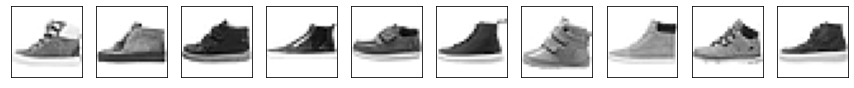

In [17]:
CM=confusion_matrix(y2,y2e)
#tirar a diagonal principal
CM=CM-np.diag(np.diag(CM))
for i in range(10):
    fpt=plt.figure(figsize=(2,2))
    idx=np.argwhere(y2==i).squeeze()
    plt.imshow(X2[idx[0],:,:],cmap='binary')
    plt.title('Classe %d'%i)
    plt.show()
    for j in range(10):
        #mostrar só imagens de classes com erros >=10
        if CM[i,j]>=10:
            print('Classe %d -> Classe %d (total de %d erros)'%(i,j,CM[i,j]))
            idx=np.argwhere((y2==i)&(y2e==j)).squeeze()
            plt.figure(figsize=(15,5))
            for k in range(10):
                plt.subplot(1,10,k+1)
                plt.imshow(X2[idx[k]],cmap='binary')
                plt.xticks([])
                plt.yticks([])
            plt.show()
            

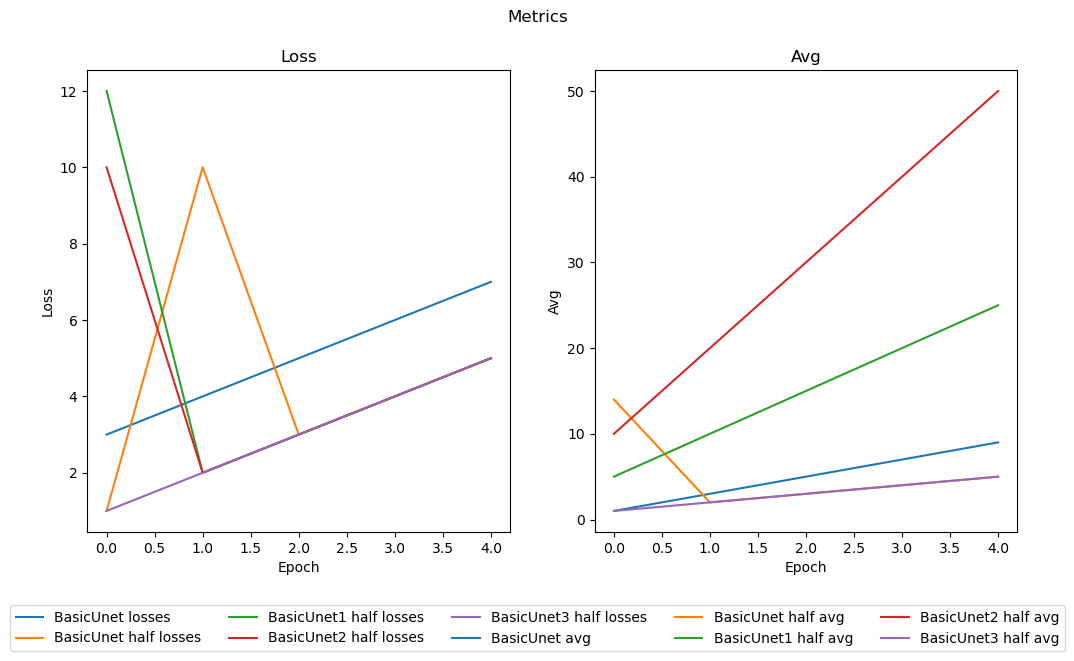

In [44]:
from tensorflow.keras import models
# matplotlib
import matplotlib.pyplot as plt
# numpy
import numpy as np

metrics = {}
metrics["BasicUnet losses"] = [3, 4, 5, 6, 7]
metrics["BasicUnet avg"] = [1,3,5,7,9]

metrics["BasicUnet half losses"] = [1,10,3,4,5 ]
metrics["BasicUnet half avg"] = [14,2,3,4,5 ]

metrics["BasicUnet1 half losses"] = [12,2,3,4,5 ]
metrics["BasicUnet1 half avg"] = [5, 10, 15, 20, 25]

metrics["BasicUnet2 half losses"] = [10,2,3,4,5 ]
metrics["BasicUnet2 half avg"] = [10, 20, 30, 40, 50]

metrics["BasicUnet3 half losses"] = [1,2,3,4,5 ]
metrics["BasicUnet3 half avg"] = [1,2,3,4,5 ]

# funcao de Plot the loss and avg curves each in the metrics dictionary side by side
def plot_metrics(metrics):
    
    # 2 subplots where the first is for the loss and the second is for the avg
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    fig.subplots_adjust(hspace=0.1, wspace=0.2)
    # for each metric in the metrics dictionary
    for metric_name, metric_values in metrics.items():
        if "loss" in metric_name:
            # plot the metric values in the corresponding subplot
            axs[0].plot(metric_values, label=metric_name)
        if "avg" in metric_name:
            axs[1].plot(metric_values, label=metric_name)

        elif "loss" not in metric_name and "avg" not in metric_name:
            print("The metric name should contain either 'loss' or 'avg'")
            print("The metric name you provided is: ", metric_name)
        

    # set the title of the figure
    fig.suptitle('Metrics')
    # set the title of the first subplot
    axs[0].set_title("Loss")
    axs[0].set_xlabel("Epoch")
    axs[0].set_ylabel("Loss")
    axs[0].set
    # set the title of the second subplot
    axs[1].set_title("Avg")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Avg")
    # set the legend of the figure in the middle of the subplots with no overlapping
    fig.legend( loc='lower center',
               bbox_to_anchor=(0.5, -0.1),
               ncol= int(len(metrics) / 2),
               fancybox=True)
    

    # show the figure
    plt.show()

plot_metrics(metrics)
